In [2]:
import pandas
from matplotlib import pyplot as plt


WARN. Missing "params" for ['DmixCnn', 'EnvNetv2', 'EnvNetv2_aug', 'D-CNN', 'DilaConv']
WARN. Missing "mmacc" for ['DmixCnn', 'EnvNetv2', 'EnvNetv2_aug', 'D-CNN', 'DilaConv', 'WSNet']


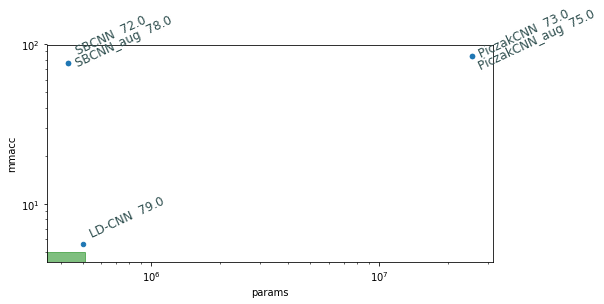

In [53]:
def check_missing(df, field, name='name'):
    missing = df[df[field].isna()]
    if len(missing):
        print('WARN. Missing "{}" for {}'.format(field, list(missing[name])))
    
def plot_models(data_path, figsize=(8,4)):

    fig, ax = plt.subplots(1, figsize=figsize)
    df = pandas.read_csv(data_path)

    check_missing(df, 'accuracy')
    check_missing(df, 'params')
    check_missing(df, 'mmacc')

    df.plot.scatter(x='params', y='mmacc', logx=True, logy=True, ax=ax)

    # highlight feasible region
    feasible_x = 512e3
    feasible_y = 5.0
    x = [ 0, feasible_x, feasible_x, 0 ]
    y = [ 0,  0, feasible_y, feasible_y ]
    ax.fill(x, y, color='green', alpha=0.5)
    
    def add_labels(row):
        xy = row.params, row.mmacc
        label = "{}  {:.1f}".format(row['name'], 100*row.accuracy) 
        ax.annotate(label, xy,
                    xytext=(5,40), 
                    textcoords='offset points',
                    size=12,
                    rotation=25,
                    color='darkslategrey')
    df.apply(add_labels, axis=1)

    return fig

plot_models('urbansound8k-existing.csv');